<a href="https://colab.research.google.com/github/Taaniya/Statistical_tests/blob/master/Dependent_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paired t-test

The paired sample t-test is also called dependent sample t-test. It’s a univariate test that tests for a significant difference between 2 related variables. An example of this is if you were to collect the blood pressure for an individual before and after some treatment, condition, or time point.

**Stating the hypothesis:**

Null hypothesis (H0): $\mu_d$ = 0, mean difference between sample 1 and sample 2 is equal to 0.

Alternative hypothesis (HA): $\mu_d$ ≠ 0, mean difference between sample 1 and sample 2 is not equal to 0.

If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.
If the t-score is greater than the critical value i.e. if the t-score lies in the critical region, then we reject the null hypothesis. Otherwise we fail to reject the null hypothesis and say that there is no significant difference between the two variables.

**Setting the criterion:**

Significance/alpha level = 5%

confidence level = 1-alpha = 95%

This is a 2-tailed test.

The dataset being tested is fictitious and contains blood pressure readings before and after an intervention.These variables are "bp_before" and "bp_after".

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [ ]:
df = pd.read_csv("./data/blood_pressure.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
patient      120 non-null int64
sex          120 non-null object
agegrp       120 non-null object
bp_before    120 non-null int64
bp_after     120 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [ ]:
# change data type to proper format
df['bp_before'] = df['bp_before'].astype(np.float64)
df['bp_after'] = df['bp_after'].astype(np.float64)

df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143.0,153.0
1,2,Male,30-45,163.0,170.0
2,3,Male,30-45,153.0,168.0
3,4,Male,30-45,153.0,142.0
4,5,Male,30-45,146.0,141.0


In [ ]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


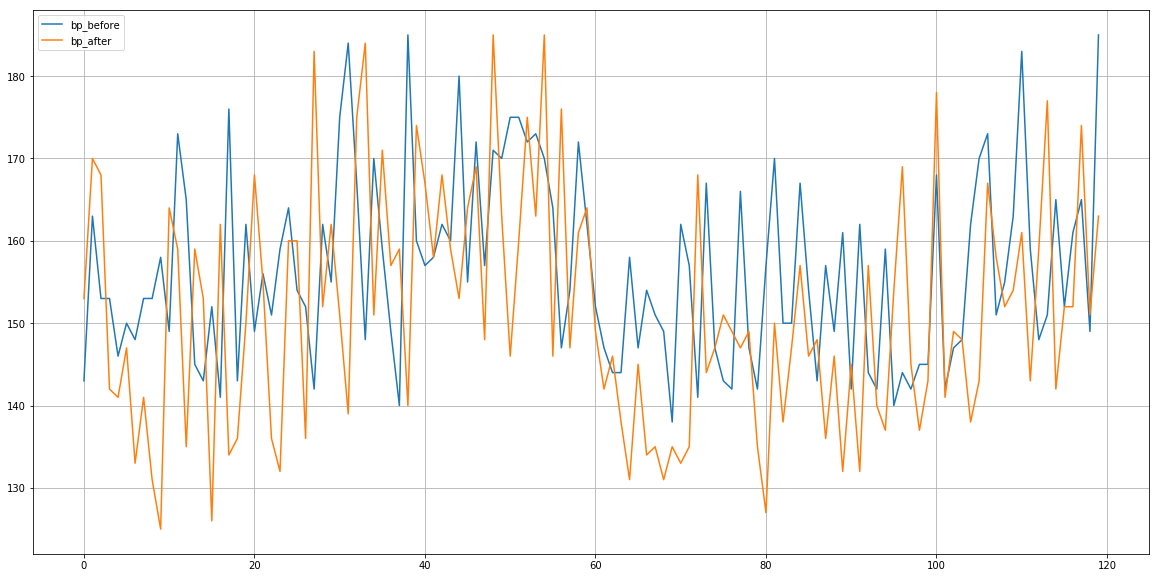

In [ ]:
df[['bp_before','bp_after']].plot(figsize=(20,10),grid=True)

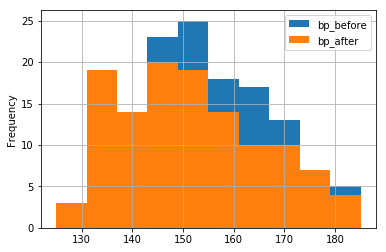

In [ ]:
df[['bp_before','bp_after']].plot(kind='hist',grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED5D930240>,
      dtype=object)

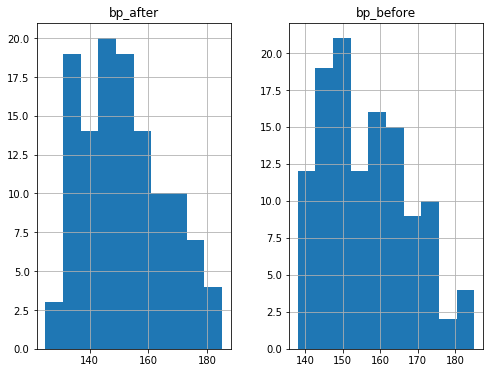

In [ ]:
df[['bp_before','bp_after']].hist(figsize=(8,6))

#### Checking assumptions

#### Checking outliers

An outlier is a value that lies in a data series on its extremes, which is either very small or large. An outlier can also be stated as a value that lies outside the overall pattern of a distribution and thus can affect the overall observation made from the data series and hence ,should be discarded from the data series.

As per the basic standards followed by all statisticians a convinient definition of an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

When performing **least squares fitting** to data, it is often best to discard outliers before computing the line of best fit since these points may greatly influence the result.

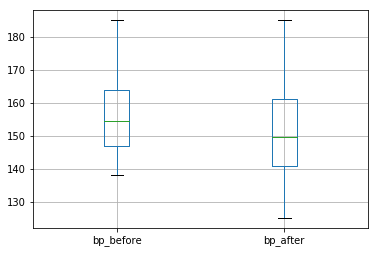

In [ ]:
df[['bp_before','bp_after']].plot(kind='box',grid=True)

*Interquartile Range(IQR) = Upper Quartile(Q3) - Lower Quartile(q1)*

*Lower Limit = Q1 - 1.5 IQR*

*Upper Limit = Q3 + 1.5 IQR*

So any value that will be more than the upper limit or lower than the lower limit will be an outlier.Only the data that lies within Lower and upper limit are statistically considered normal and thus can be used for further observation or study.

*bp_before*

IQR = 164-147 = 17

Lower limit = Q1 - 1.5(IQR) = 147 - (1.5\*17) = 121.5

Upper limit = Q3 + 1.5(IQR) = 164 + (1.5\*17) = 189.5

*bp_after*

IQR = 161-140 = 21

Lower limit = 140 - (1.5\*21) = 108.5

Upper limit = 161 + (1.5\*21) = 192.5

There is no outlier in the dataset.

#### Checking Normality

For dependent sample T-test, the normlaity check needs to be conducted on differences between two scores.

There are a few ways one can test this assumption - Histogram,Q-Q plot, statistical test.
Below I have created a variable for the differences and run it through these methods.

In [ ]:
df['bp_difference'] = df['bp_before'] - df['bp_after']

##### Histogram

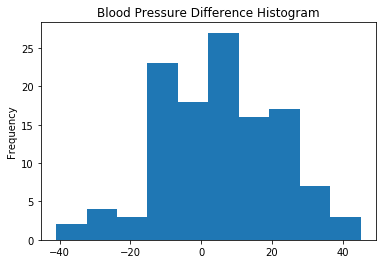

In [ ]:
df['bp_difference'].plot(kind='hist',title="Blood Pressure Difference Histogram")

The histogram of this data seems to be normally distributed.Let's try the second way: Q-Q plot.

Text(0.5,1,'blood Pressure Q-Q plot')

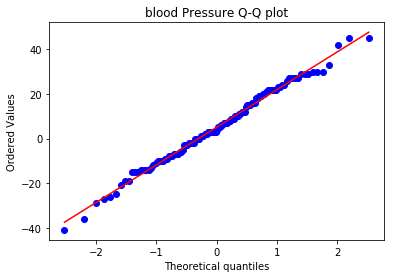

In [ ]:
stats.probplot(df['bp_difference'],plot=plt)
plt.title("blood Pressure Q-Q plot")

The observed deviation is not severe.

Compute your t-statistic using the formula given below -

$$ t-statistic = \frac{\mu_{diff} - Hypothesized Value}{SE_{diff}}$$

where 

$$ SE_{diff} = \frac{sd_{diff}}{\sqrt n}$$

$$SE_{diff} = \text{Standard error of the difference} $$
$$sd_{diff} = \text{standard deviation of the difference} $$


In [ ]:
def findT_Statistic(df,column_name):
    mean_deviation = df[column_name].mean()
    deviation_var = np.var(df[column_name],ddof=1)
    standard_error = np.sqrt(deviation_var/len(df[column_name]))
    t_statistic = mean_deviation/standard_error
    return t_statistic

In [ ]:
t_score = findT_Statistic(df,'bp_difference')
t_score

3.337187051083365

##### Statitistical test- Shapiro
This is Shapiro-Wilk test for normality with Null hypothesis that the data is drawn from a normal distribution.The first value is the W test value, and the second value is the p-value.

In [ ]:
stats.shapiro(df['bp_difference'])

(0.9926842451095581, 0.7841846942901611)

The test was non-significant. Therefore, the difference between the two conditions is normally distributed. If this test were to be significant, an appropriate alternative to use would be the Wilcoxon signed-rank test.

#### Paired Sample T-test

In [ ]:
t_stat_result = stats.ttest_rel(df['bp_before'],df['bp_after'])
t_stat_result

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

The above test returns the test statistic and 2-tailed p-value.

Another component needed to report the findings is the degrees of freedom (df).This can be calculated by taking the total number of paired observations and subtracting 1.In our case, df=120-1=119.

The tabular critical value of t-statistic at 95% confidence interval with 119 degrees of freedom is 1.980. Since our test statistic value is greater than the critical value, it lies in the rejection region.

The findings are statistically significant. One can reject the null hypothesis insupport of the alternative.The blood pressure before the intervention was higher (156.45 ± 11.39 units) compared to blood pressure post intervention (151.36 ± 14.18 units); there was statistically significant decrease inn blood pressure (t(119)=3.34,p=0.0011) of 5.09 units.

### More Applications - 

* [BLEU: a Method for Automatic Evaluation of Machine Translation - Kishore Papineni, et al. 2002"](https://www.aclweb.org/anthology/P02-1040.pdf)